In [4]:
from google.colab import files
uploaded = files.upload()

Saving global_superstore_2016.xlsx to global_superstore_2016.xlsx


In [6]:
import pandas as pd

file_path = 'global_superstore_2016.xlsx'

xls = pd.ExcelFile(file_path)

print(xls.sheet_names)

['Orders', 'Returns', 'People']


In [7]:
orders_df = pd.read_excel(file_path, sheet_name='Orders')
returns_df = pd.read_excel(file_path, sheet_name='Returns')
people_df = pd.read_excel(file_path, sheet_name='People')

In [8]:
print("Orders Shape:", orders_df.shape)
print("Returns Shape:", returns_df.shape)
print("People Shape:", people_df.shape)

Orders Shape: (51290, 24)
Returns Shape: (1079, 3)
People Shape: (24, 2)


In [9]:
print("Orders DataFrame:")
print(orders_df.head(5))

print("\nReturns DataFrame:")
print(returns_df.head(5))

print("\nPeople DataFrame:")
print(people_df.head(5))

Orders DataFrame:
   Row ID                  Order ID Order Date  Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13   First Class   
1   26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07  Second Class   
2   25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18   First Class   
3   13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30   First Class   
4   47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

   ...   Product ID    Category Sub-Category  \
0  ...  TEC-PH

In [10]:
print("Missing values in Orders DF:\n", orders_df.isnull().sum())
print("\nMissing values in Returns DF:\n", returns_df.isnull().sum())
print("\nMissing values in People DF:\n", people_df.isnull().sum())

Missing values in Orders DF:
 Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

Missing values in Returns DF:
 Returned    0
Order ID    0
Region      0
dtype: int64

Missing values in People DF:
 Person    0
Region    0
dtype: int64


In [11]:
print("Duplicate rows in Orders DF:", orders_df.duplicated().sum())
print("Duplicate rows in Returns DF:", returns_df.duplicated().sum())
print("Duplicate rows in People DF:", people_df.duplicated().sum())

Duplicate rows in Orders DF: 0
Duplicate rows in Returns DF: 0
Duplicate rows in People DF: 0


In [12]:
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])
orders_df['Ship Date'] = pd.to_datetime(orders_df['Ship Date'])

In [13]:
orders_df = orders_df.drop_duplicates()
returns_df = returns_df.drop_duplicates()
people_df = people_df.drop_duplicates()

In [14]:
orders_df['Sales'] = orders_df['Sales'].fillna(0)
orders_df['Profit'] = orders_df['Profit'].fillna(0)

In [15]:
orders_df = orders_df.drop('Postal Code', axis=1)

In [16]:
print("Regions in Orders:", orders_df['Region'].unique())
print("Regions in Returns:", returns_df['Region'].unique())
print("Regions in People:", people_df['Region'].unique())

Regions in Orders: ['Central US' 'Oceania' 'Western Europe' 'Western Africa' 'Western US'
 'Southern Asia' 'Western Asia' 'South America' 'Eastern Asia'
 'Southern Europe' 'Eastern Africa' 'Eastern Europe' 'Northern Europe'
 'Central America' 'Eastern US' 'Caribbean' 'Central Africa'
 'Southeastern Asia' 'Southern US' 'North Africa' 'Southern Africa'
 'Canada' 'Central Asia']
Regions in Returns: ['Central US' 'Eastern Asia' 'Oceania' 'Western Europe' 'Southern Europe'
 'Western Asia' 'Southern US' 'Southern Africa' 'Eastern US'
 'Eastern Europe' 'Southeastern Asia' 'Western US' 'Southern Asia'
 'Northern Europe' 'Eastern Canada' 'Central America' 'South America'
 'North Africa' 'Caribbean' 'Central Africa' 'Western Africa'
 'Eastern Africa' 'Central Asia' 'Western Canada']
Regions in People: ['Caribbean' 'Central Africa' 'Central America' 'Central Asia'
 'Central US' 'Eastern Africa' 'Eastern Asia' 'Eastern Canada'
 'Eastern Europe' 'Eastern US' 'North Africa' 'Northern Europe' 'Oceani

In [17]:
orders_df = orders_df.reset_index(drop=True)
returns_df = returns_df.reset_index(drop=True)
people_df = people_df.reset_index(drop=True)

In [18]:
print("Orders shape after cleaning:", orders_df.shape)
print("Returns shape after cleaning:", returns_df.shape)
print("People shape after cleaning:", people_df.shape)

Orders shape after cleaning: (51290, 23)
Returns shape after cleaning: (1079, 3)
People shape after cleaning: (24, 2)


In [19]:
orders_df = orders_df.merge(returns_df[['Order ID', 'Returned']], on='Order ID', how='left')
orders_df['Returned'] = orders_df['Returned'].fillna('No')

In [20]:
orders_df = orders_df.merge(people_df, on='Region', how='left')

In [21]:
print("Final Orders DF shape after all merges:", orders_df.shape)
print("\nColumns now in Orders DF:\n", orders_df.columns)

Final Orders DF shape after all merges: (51290, 25)

Columns now in Orders DF:
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Returned', 'Person'],
      dtype='object')


In [22]:
total_sales = orders_df['Sales'].sum()
total_profit = orders_df['Profit'].sum()

print(f"💰 Total Sales: ${total_sales:,.2f}")
print(f"💹 Total Profit: ${total_profit:,.2f}")

💰 Total Sales: $12,642,501.91
💹 Total Profit: $1,467,457.29


In [23]:
avg_sales = orders_df['Sales'].mean()
avg_profit = orders_df['Profit'].mean()

print(f"📊 Average Sales per Order: ${avg_sales:,.2f}")
print(f"📈 Average Profit per Order: ${avg_profit:,.2f}")

📊 Average Sales per Order: $246.49
📈 Average Profit per Order: $28.61


In [24]:
return_rate = orders_df[orders_df['Returned'] == 'Yes'].shape[0] / orders_df.shape[0] * 100
print(f"⚠️ Return Rate: {return_rate:.2f}%")

profit_loss_returns = orders_df[orders_df['Returned'] == 'Yes']['Profit'].sum()
print(f"📉 Profit lost due to Returns: ${profit_loss_returns:,.2f}")

⚠️ Return Rate: 4.33%
📉 Profit lost due to Returns: $61,370.65


In [25]:
region_summary = orders_df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Sales', ascending=False)

print("🌍 Region-wise Financial Summary:\n")
print(region_summary)

🌍 Region-wise Financial Summary:

                          Sales        Profit
Region                                       
Western Europe     1.731930e+06  218433.50850
Central America    1.223101e+06  158981.64816
Oceania            1.100185e+06  120089.11200
Southeastern Asia  8.844232e+05   17852.32900
Southern Asia      8.665727e+05  159336.42700
Eastern Asia       8.550594e+05  167101.85100
Western US         7.254578e+05  108418.44890
Eastern US         6.787812e+05   91522.78000
Northern Europe    6.367792e+05   83923.91700
South America      6.172237e+05   28090.51788
Southern Europe    6.085940e+05   70109.41800
Central US         5.012399e+05   39706.36250
Southern US        3.917219e+05   46749.43030
Caribbean          3.242809e+05   34571.32104
Western Asia       3.171070e+05  -53921.67000
Eastern Europe     3.100334e+05   77084.88000
North Africa       2.332166e+05   57836.25000
Western Africa     1.738788e+05  -50407.78800
Central Africa     1.436300e+05   35383.71000


In [26]:
segment_summary = orders_df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Sales', ascending=False)

print("\n👥 Segment-wise Financial Summary:\n")
print(segment_summary)


👥 Segment-wise Financial Summary:

                    Sales        Profit
Segment                                
Consumer     6.507949e+06  749239.78206
Corporate    3.824698e+06  441208.32866
Home Office  2.309855e+06  277009.18056


In [27]:
manager_summary = orders_df.groupby('Person').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Sales', ascending=False)

print("\n🧑‍💼 Manager-wise Financial Summary:\n")
print(manager_summary)


🧑‍💼 Manager-wise Financial Summary:

                             Sales        Profit
Person                                          
Gilbert Wolff         1.731930e+06  218433.50850
Nicodemo Bautista     1.223101e+06  158981.64816
Kauri Anaru           1.100185e+06  120089.11200
Preecha Metharom      8.844232e+05   17852.32900
Chandrakant Chaudhri  8.665727e+05  159336.42700
Hadia Bousaid         8.550594e+05  167101.85100
Derrick Snyders       7.254578e+05  108418.44890
Dolores Davis         6.787812e+05   91522.78000
Miina Nylund          6.367792e+05   83923.91700
Vasco Magalhães       6.172237e+05   28090.51788
Gavino Bove           6.085940e+05   70109.41800
Lon Bonher            5.012399e+05   39706.36250
Flannery Newton       3.917219e+05   46749.43030
Marilène Rousseau     3.242809e+05   34571.32104
Kaoru Xun             3.171070e+05  -53921.67000
Oxana Lagunov         3.100334e+05   77084.88000
Lindiwe Afolayan      2.332166e+05   57836.25000
Katlego Akosua        1.738788e

In [28]:
return_region = orders_df.groupby('Region').agg({
    'Returned': lambda x: (x == 'Yes').sum(),
    'Order ID': 'count'
})

return_region['Return Rate (%)'] = (return_region['Returned'] / return_region['Order ID']) * 100

print("\n🔄 Region-wise Return Rates (%):\n")
print(return_region[['Return Rate (%)']])


🔄 Region-wise Return Rates (%):

                   Return Rate (%)
Region                            
Canada                    3.906250
Caribbean                 4.082840
Central Africa            2.643857
Central America           4.415954
Central Asia              4.147465
Central US                3.185536
Eastern Africa            2.472527
Eastern Asia              5.518113
Eastern Europe            2.746893
Eastern US                4.705056
North Africa              3.990610
Northern Europe           3.448276
Oceania                   4.416404
South America             4.451138
Southeastern Asia         4.474273
Southern Africa           5.230126
Southern Asia             4.180791
Southern Europe           5.300521
Southern US               5.123457
Western Africa            4.109589
Western Asia              4.426230
Western Europe            3.960564
Western US                5.526069


In [36]:
# Format Region Summary
region_summary_formatted = region_summary.copy()
for col in region_summary_formatted.columns:
    region_summary_formatted[col] = region_summary_formatted[col].map(lambda x: f"${x:,.2f}")

print("🌍 Region-wise Financial Summary:\n")
print(region_summary_formatted)

# Format Segment Summary
segment_summary_formatted = segment_summary.copy()
for col in segment_summary_formatted.columns:
    segment_summary_formatted[col] = segment_summary_formatted[col].map(lambda x: f"${x:,.2f}")

print("\n👥 Segment-wise Financial Summary:\n")
print(segment_summary_formatted)

# Format Manager Summary
manager_summary_formatted = manager_summary.copy()
for col in manager_summary_formatted.columns:
    manager_summary_formatted[col] = manager_summary_formatted[col].map(lambda x: f"${x:,.2f}")

print("\n🧑‍💼 Manager-wise Financial Summary:\n")
print(manager_summary_formatted)

return_region['Return Rate (%)'] = return_region['Return Rate (%)'].round(2)
print("\n🔄 Region-wise Return Rates (%):\n")
print(return_region[['Return Rate (%)']])

🌍 Region-wise Financial Summary:

                           Sales       Profit
Region                                       
Western Europe     $1,731,929.67  $218,433.51
Central America    $1,223,100.63  $158,981.65
Oceania            $1,100,184.61  $120,089.11
Southeastern Asia    $884,423.17   $17,852.33
Southern Asia        $866,572.68  $159,336.43
Eastern Asia         $855,059.39  $167,101.85
Western US           $725,457.82  $108,418.45
Eastern US           $678,781.24   $91,522.78
Northern Europe      $636,779.16   $83,923.92
South America        $617,223.68   $28,090.52
Southern Europe      $608,593.97   $70,109.42
Central US           $501,239.89   $39,706.36
Southern US          $391,721.91   $46,749.43
Caribbean            $324,280.86   $34,571.32
Western Asia         $317,106.96  $-53,921.67
Eastern Europe       $310,033.44   $77,084.88
North Africa         $233,216.61   $57,836.25
Western Africa       $173,878.81  $-50,407.79
Central Africa       $143,630.01   $35,383.71


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%matplotlib inline

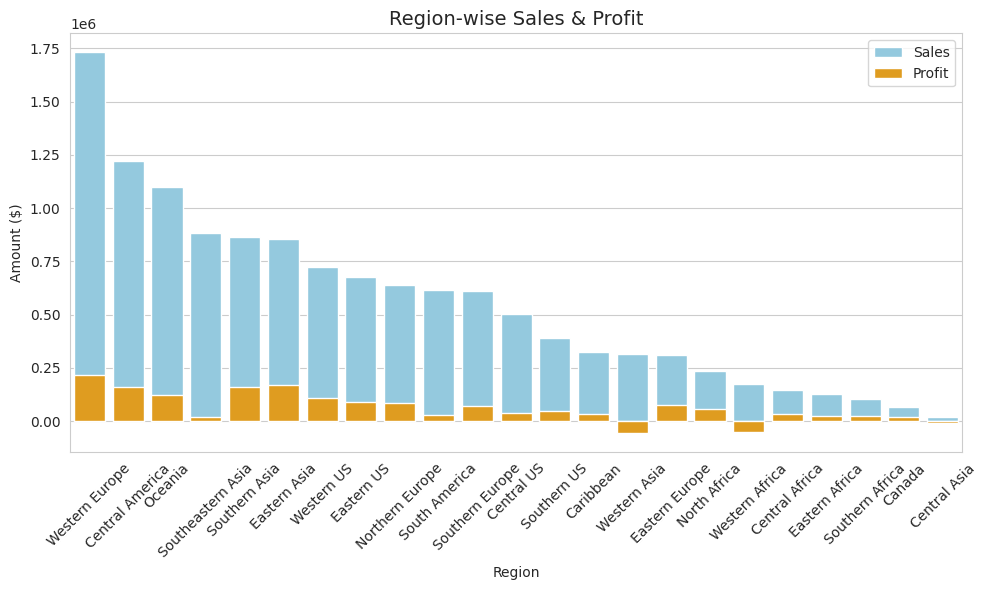

In [37]:
plt.figure(figsize=(10,6))
region_plot = region_summary.reset_index()

# Plotting
sns.barplot(x='Region', y='Sales', data=region_plot, color='skyblue', label='Sales')
sns.barplot(x='Region', y='Profit', data=region_plot, color='orange', label='Profit')

plt.title('Region-wise Sales & Profit', fontsize=14)
plt.ylabel('Amount ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

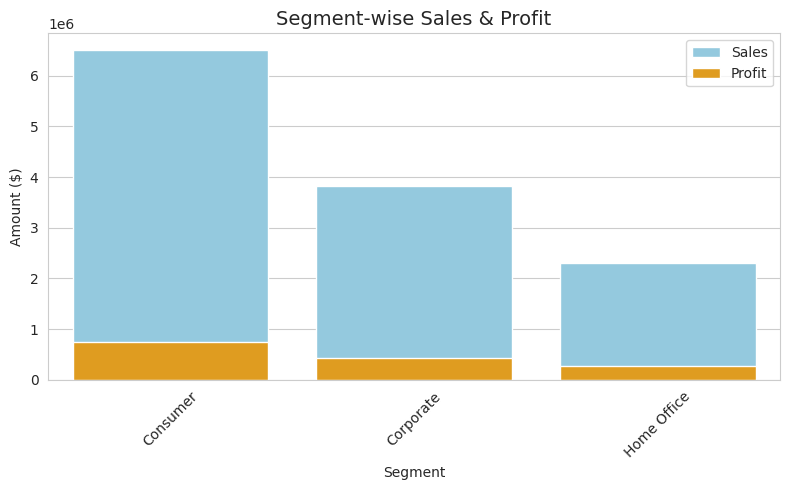

In [38]:
plt.figure(figsize=(8,5))
segment_plot = segment_summary.reset_index()

sns.barplot(x='Segment', y='Sales', data=segment_plot, color='skyblue', label='Sales')
sns.barplot(x='Segment', y='Profit', data=segment_plot, color='orange', label='Profit')

plt.title('Segment-wise Sales & Profit', fontsize=14)
plt.ylabel('Amount ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

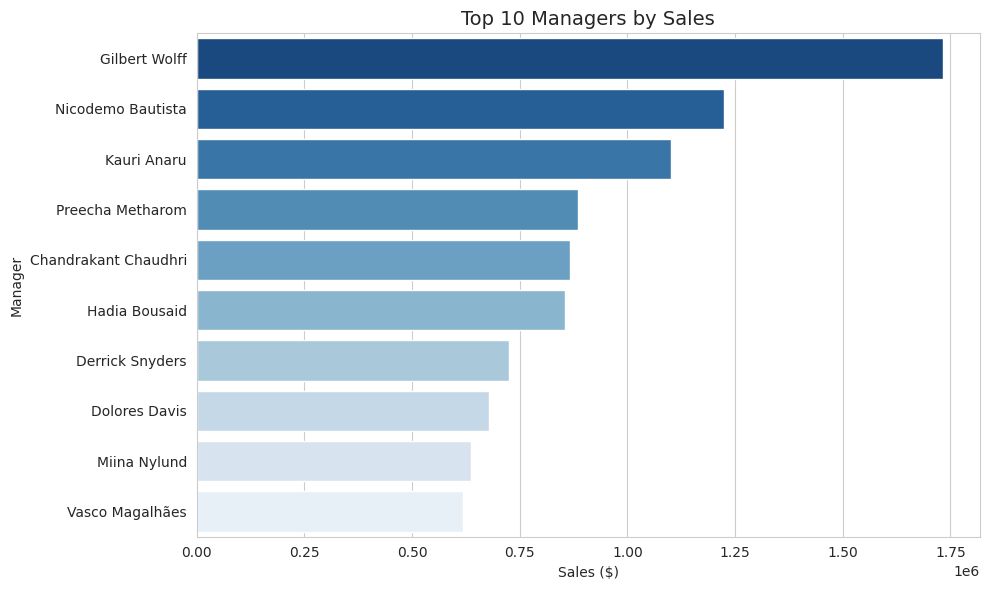

In [40]:
plt.figure(figsize=(10,6))
top10_manager = manager_summary.sort_values(by='Sales', ascending=False).head(10).reset_index()

sns.barplot(
    x='Sales',
    y='Person',
    data=top10_manager,
    hue='Person',         # add hue
    palette='Blues_r',
    dodge=False,          # keeps single bars per manager
    legend=False          # removes duplicate legend
)

plt.title('Top 10 Managers by Sales', fontsize=14)
plt.xlabel('Sales ($)')
plt.ylabel('Manager')
plt.tight_layout()
plt.show()

In [54]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

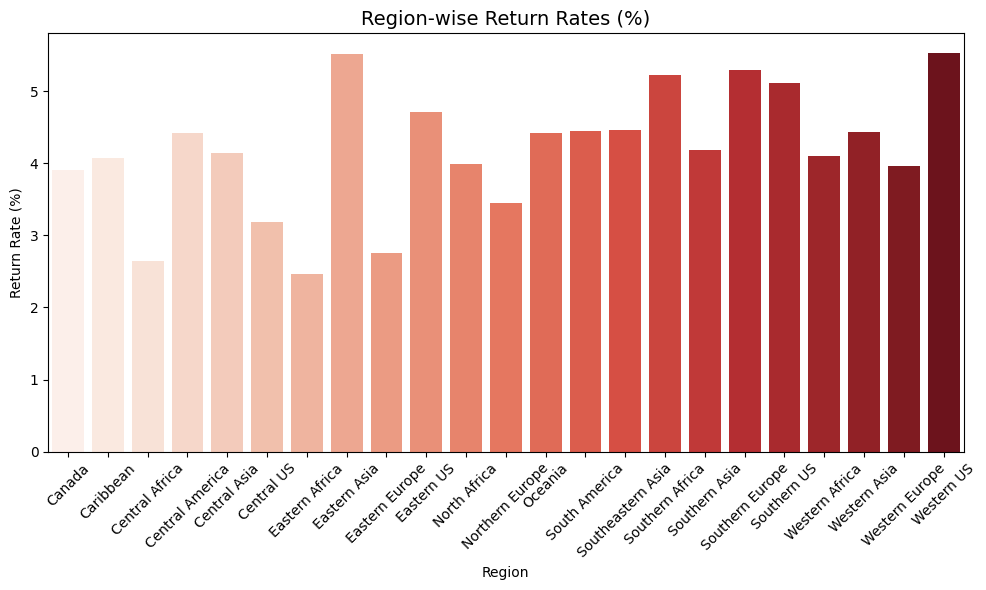

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

return_region = orders_df.groupby('Region').agg({
    'Returned': lambda x: (x == 'Yes').sum(),
    'Order ID': 'count'
})

return_region['Return Rate (%)'] = (return_region['Returned'] / return_region['Order ID']) * 100
return_region['Return Rate (%)'] = return_region['Return Rate (%)'].round(2)

plt.figure(figsize=(10,6))
returns_plot = return_region.reset_index()

sns.barplot(
    x='Region',
    y='Return Rate (%)',
    data=returns_plot,
    hue='Region',
    palette='Reds',
    dodge=False,
    legend=False
)

plt.title('Region-wise Return Rates (%)', fontsize=14)
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()